# Libraries

In [209]:
%matplotlib inline

In [210]:
import os
import cv2
import torch
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image Acquisition

## Frame Extraction

In [211]:
extracted_exercise_videos_path = '/kaggle/input/exercises/'
videos_folder_path = os.path.join(extracted_exercise_videos_path, 'Videos')
videos_list = os.listdir(videos_folder_path)
videos_list

['Sit-up.mp4',
 'PullUps.mp4',
 'Jumping Jacks.mp4',
 'PushUps.mp4',
 'Air Squat.mp4']

In [212]:
# Function to extract frames from videos at a set interval
def extract_frames_from_video(video_path, output_dir, frame_interval):
    os.makedirs(output_dir, exist_ok=True)
    
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)
    
    # Get video properties
    fps = video_capture.get(cv2.CAP_PROP_FPS)
    interval = int(fps * frame_interval)  # Interval in seconds 
    
    frame_count = 0
    extracted_frame_count = 0
    
    # Iterate over the video frames and extract frames at defined intervals
    while video_capture.isOpened():
        ret, frame = video_capture.read()
        if not ret:
            break

        # Save frames at the defined interval
        if frame_count % interval == 0:
            frame_filename = os.path.join(output_dir, f"frame_{extracted_frame_count}.jpg")
            cv2.imwrite(frame_filename, frame)
            extracted_frame_count += 1

        frame_count += 1
    
    # Release the video capture object
    video_capture.release()

In [213]:
# Define the interval for frame extraction
frame_interval = 1

writable_output_path = '/kaggle/working/'

# Extract frames for each video in the dataset to the new writable directory
for video_file in videos_list:
    video_path = os.path.join(videos_folder_path, video_file)
    output_dir = os.path.join(writable_output_path, f"{os.path.splitext(video_file)[0]}_frames")
    
    # Extract frames from the current video
    extract_frames_from_video(video_path, output_dir, frame_interval)

extracted_folders_writable = os.listdir(writable_output_path)
extracted_folders_writable

['scaler.save',
 'Air Squat_frames',
 'PullUps_frames',
 'label_encoder.save',
 '.virtual_documents',
 'Sit-up_frames',
 'PushUps_frames',
 'yolov5s.pt',
 'Jumping Jacks_frames',
 'yolov5',
 'exercise_cnn_model.h5']

## Frame Visualization

In [214]:
# Function to display a set of images for inspection
def display_images_from_folder(folder_path, num_images=5):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    plt.figure(figsize=(10, 10))
    # Display a few images from the folder
    for i, image_file in enumerate(image_files[:num_images]):
        image_path = os.path.join(folder_path, image_file)
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')

    plt.show()

Displaying frames from: Air Squat_frames


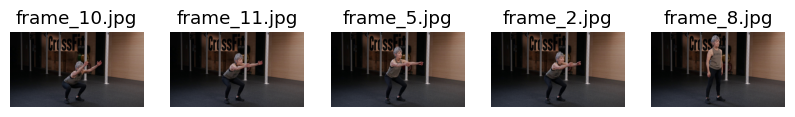

Displaying frames from: Jumping Jacks_frames


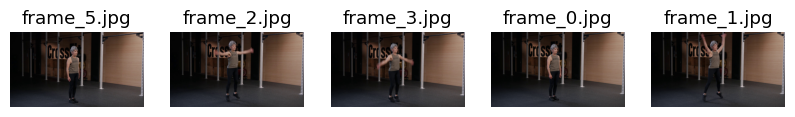

Displaying frames from: PullUps_frames


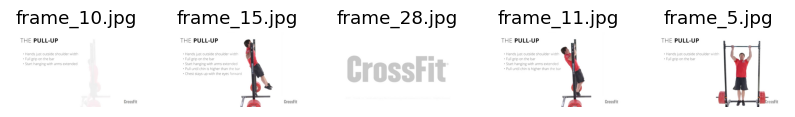

Displaying frames from: PushUps_frames


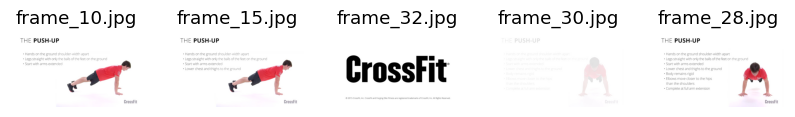

Displaying frames from: Sit-up_frames


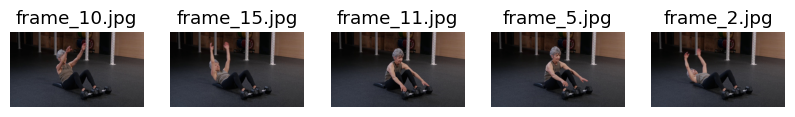

In [215]:
# Inspect frames from each folder
for folder in ['Air Squat_frames', 'Jumping Jacks_frames', 'PullUps_frames', 'PushUps_frames', 'Sit-up_frames']:
    folder_path = os.path.join(writable_output_path, folder)
    print(f"Displaying frames from: {folder}")
    display_images_from_folder(folder_path)

# Bounding Box Detection Using YOLO

In [216]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [217]:
# # Load a pretrained YOLOv5 model (you can use 'yolov5s', 'yolov5m', 'yolov5l', or 'yolov5x')
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

In [218]:
# # Path to the root folder containing all exercise frame folders
# root_folder = '/kaggle/working/'

# # List of exercise frame folders
# exercise_folders = ['Sit-up_frames']

# # Loop through each folder and apply YOLOv5 to all frames
# for exercise in exercise_folders:
#     exercise_folder_path = os.path.join(root_folder, exercise)
#     print(f"Processing frames for: {exercise}")
    
#     # Process each frame in the exercise folder
#     for frame_file in os.listdir(exercise_folder_path):
#         frame_path = os.path.join(exercise_folder_path, frame_file)
        
#         # Run YOLOv5 on the frame
#         results = model(frame_path)
        
#         # Display the image with bounding boxes
#         results.show()

# 3D Pose Estimation

In [219]:
!pip install mediapipe

In [220]:
# import cv2
# import mediapipe as mp

In [221]:
# # Initialize MediaPipe Pose solution
# mp_pose = mp.solutions.pose
# pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, min_detection_confidence=0.5)

In [222]:
# # Function to crop image based on YOLO bounding box
# def crop_image_based_on_bbox(image_path, bbox):
#     image = cv2.imread(image_path)
#     x_min, y_min, x_max, y_max = map(int, bbox[:4])  # Extract bounding box coordinates from YOLO output
#     cropped_image = image[y_min:y_max, x_min:x_max]
#     return cropped_image

In [223]:
# # Function to get bounding box from a frame
# def get_bounding_box(image_path):
#     # Run YOLOv5 inference on the image
#     results = model(image_path)
    
#     # Extract the bounding box coordinates (xyxy format)
#     bbox_tensor = results.xyxy[0]  # First result tensor (for the first detected object)
    
#     # Convert the tensor to a list and extract only the first bounding box (person detection)
#     if len(bbox_tensor) > 0:
#         bbox = bbox_tensor[0][:4].tolist()  # [x_min, y_min, x_max, y_max]
#         return bbox
#     else:
#         return None  # No bounding box found

In [224]:
# # Function to process an image and estimate 3D pose
# def estimate_pose(image_path, bbox):
#      # Crop the image using the YOLO bounding box
#     cropped_image = crop_image_based_on_bbox(image_path, bbox)
    
#     # Convert the cropped image to RGB (OpenCV uses BGR)
#     cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    
#     # Perform pose detection on the cropped image
#     results = pose.process(cropped_image_rgb)
    
#     # Draw the pose landmarks on the cropped image
#     annotated_image = cropped_image_rgb.copy()
#     if results.pose_landmarks:
#         mp.solutions.drawing_utils.draw_landmarks(
#             annotated_image, 
#             results.pose_landmarks, 
#             mp_pose.POSE_CONNECTIONS,
#             mp.solutions.drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
#             mp.solutions.drawing_utils.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
#         )
    
#     # Display the annotated cropped image using matplotlib
#     plt.figure(figsize=(8, 8))
#     plt.imshow(annotated_image)
#     plt.axis('off')
#     plt.show()
    
#     # Extract and print the 3D landmark coordinates
#     if results.pose_landmarks:
#         landmarks = results.pose_landmarks.landmark
#         for i, landmark in enumerate(landmarks):
#             print(f'Landmark {i}: (x: {landmark.x}, y: {landmark.y}, z: {landmark.z})')

In [225]:
# image_path = '/kaggle/working/Sit-up_frames/frame_16.jpg'
# bbox = get_bounding_box(image_path)


# estimate_pose(image_path, bbox)

# Custom CNN for Exercise Classification

## Preparing Dataset

In [226]:
# Load the CSV files into dataframes
landmarks_df = pd.read_csv('/kaggle/input/exercise-data/landmarks.csv')
distances_df = pd.read_csv('/kaggle/input/exercise-data/3d_distances.csv')
angles_df = pd.read_csv('/kaggle/input/exercise-data/angles.csv')
labels_df = pd.read_csv('/kaggle/input/exercise-data/labels.csv')

In [227]:
# Drop 'pose_id' from Landmarks DataFrame
landmarks_df = landmarks_df.drop('pose_id', axis=1)

# Drop 'pose_id' from Distances DataFrame
distances_df = distances_df.drop('pose_id', axis=1)

# Drop 'pose_id' from Angles DataFrame
angles_df = angles_df.drop('pose_id', axis=1)

In [228]:
# Check the shapes
print("Landmarks DataFrame shape:", landmarks_df.shape)
print("Distances DataFrame shape:", distances_df.shape)
print("Angles DataFrame shape:", angles_df.shape)

# Check the columns
print("Landmarks DataFrame columns:", landmarks_df.columns.tolist())
print("Distances DataFrame columns:", distances_df.columns.tolist())
print("Angles DataFrame columns:", angles_df.columns.tolist())

Landmarks DataFrame shape: (1372, 99)
Distances DataFrame shape: (1372, 16)
Angles DataFrame shape: (1372, 7)
Landmarks DataFrame columns: ['x_nose', 'y_nose', 'z_nose', 'x_left_eye_inner', 'y_left_eye_inner', 'z_left_eye_inner', 'x_left_eye', 'y_left_eye', 'z_left_eye', 'x_left_eye_outer', 'y_left_eye_outer', 'z_left_eye_outer', 'x_right_eye_inner', 'y_right_eye_inner', 'z_right_eye_inner', 'x_right_eye', 'y_right_eye', 'z_right_eye', 'x_right_eye_outer', 'y_right_eye_outer', 'z_right_eye_outer', 'x_left_ear', 'y_left_ear', 'z_left_ear', 'x_right_ear', 'y_right_ear', 'z_right_ear', 'x_mouth_left', 'y_mouth_left', 'z_mouth_left', 'x_mouth_right', 'y_mouth_right', 'z_mouth_right', 'x_left_shoulder', 'y_left_shoulder', 'z_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'z_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'z_left_elbow', 'x_right_elbow', 'y_right_elbow', 'z_right_elbow', 'x_left_wrist', 'y_left_wrist', 'z_left_wrist', 'x_right_wrist', 'y_right_wrist', 'z_right_wris

In [229]:
print("Number of distance features:", distances_df.shape[1])

Number of distance features: 16


In [230]:
print("Number of angle features:", angles_df.shape[1])

Number of angle features: 7


In [231]:
# Combine landmarks, 3D distances, and angles into a single feature matrix X
features_df = pd.concat([landmarks_df, distances_df, angles_df], axis=1)

# Display the shape of the combined feature dataframe
print("Shape of combined features:", features_df.shape)

Shape of combined features: (1372, 122)


In [232]:
y = labels_df['pose'].values  
X = features_df.values  

In [233]:
from sklearn.preprocessing import StandardScaler

# Normalize the features 
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [234]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)


# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1097, 122)
X_test shape: (275, 122)
y_train shape: (1097,)
y_test shape: (275,)


## CNN Model Architecture

In [236]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [237]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [238]:
# Define the 1D CNN model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Adjust the number of classes if needed

In [239]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [240]:
print("Unique classes in y_train_encoded:", np.unique(y_train_encoded))
print("Unique classes in y_test_encoded:", np.unique(y_test_encoded))

Unique classes in y_train_encoded: [0 1 2 3 4 5 6 7 8 9]
Unique classes in y_test_encoded: [0 1 2 3 4 5 6 7 8 9]


In [241]:
# Train the model
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test_encoded))

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2373 - loss: 2.1563 - val_accuracy: 0.5200 - val_loss: 1.5098
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4884 - loss: 1.4602 - val_accuracy: 0.6582 - val_loss: 1.0709
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6231 - loss: 1.0884 - val_accuracy: 0.7018 - val_loss: 0.9389
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6982 - loss: 0.8926 - val_accuracy: 0.7382 - val_loss: 0.7870
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7228 - loss: 0.7753 - val_accuracy: 0.7600 - val_loss: 0.7273
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7575 - loss: 0.7333 - val_accuracy: 0.7818 - val_loss: 0.6760
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7738 - loss: 0.6474 - val_accuracy: 0.7782 - val_loss: 0.6240
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8264 - loss: 0.5314 - val_accuracy: 0.7782 - val_loss

In [242]:
from sklearn.metrics import classification_report

# List of all exercise class names corresponding to your labels (0-9)
target_names = ['jumping_jacks_down', 'jumping_jacks_up', 'pullups_down', 'pullups_up', 'pushups_down', 'pushups_up', 'situp_down', 'situp_up', 'squats_down', 'squats_up']

# Predict the exercise class for the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Print classification report
print(classification_report(y_test_encoded, y_pred_classes, target_names=target_names))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
                    precision    recall  f1-score   support

jumping_jacks_down       0.88      0.97      0.92        31
  jumping_jacks_up       0.92      0.87      0.89        39
      pullups_down       0.84      0.87      0.85        30
        pullups_up       0.93      0.76      0.83        33
      pushups_down       0.94      1.00      0.97        15
        pushups_up       0.96      0.93      0.95        29
        situp_down       0.84      0.91      0.87        23
          situp_up       0.78      0.70      0.74        20
       squats_down       0.86      0.96      0.91        26
         squats_up       0.77      0.79      0.78        29

          accuracy                           0.87       275
         macro avg       0.87      0.88      0.87       275
      weighted avg       0.87      0.87      0.87       275



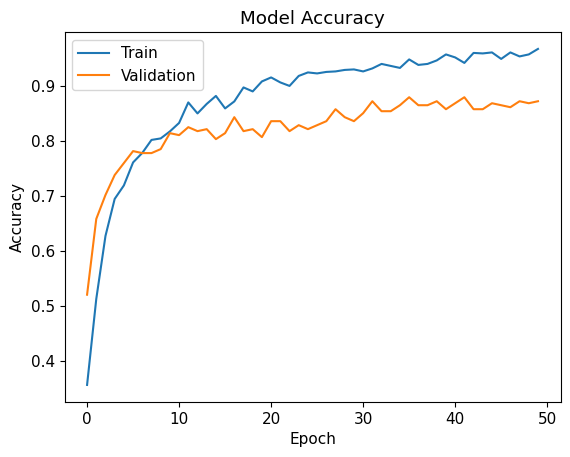

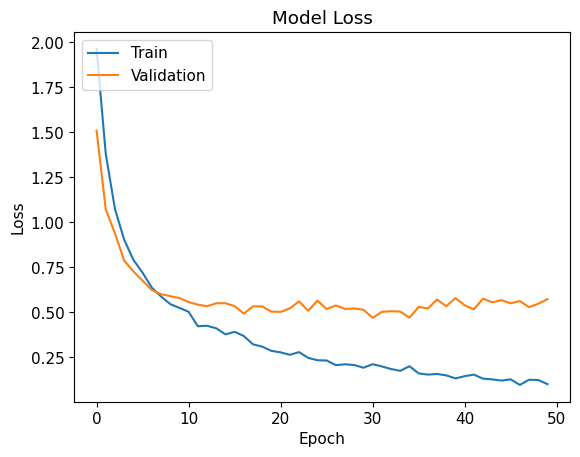

In [243]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [244]:
# Save the trained model to the working directory
model.save('/kaggle/working/exercise_cnn_model.h5')

In [245]:
# Save the scaler to the working directory
joblib.dump(scaler, '/kaggle/working/scaler.save')

['/kaggle/working/scaler.save']

In [246]:
# Save the label encoder to the working directory
joblib.dump(label_encoder, '/kaggle/working/label_encoder.save')

['/kaggle/working/label_encoder.save']

# Mapping and Visualization

## Testing Phase

In [247]:
from tensorflow.keras.models import load_model

In [248]:
# Load the trained model from the working directory
model_cnn = load_model('/kaggle/working/exercise_cnn_model.h5')

# Load the scaler from the working directory
scaler = joblib.load('/kaggle/working/scaler.save')

# Load the label encoder from the working directory
label_encoder = joblib.load('/kaggle/working/label_encoder.save')

In [249]:
# Load the pre-trained YOLOv5 model
model_yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-22 Python-3.10.14 torch-2.4.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [250]:
# Initialize MediaPipe Pose solution
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=False,
    min_detection_confidence=0.5
)

In [261]:
# Function to detect the person in the image using YOLO
def get_bounding_box(image_path):
    # Run YOLOv5 inference on the image
    results = model_yolo(image_path)
    
    # Extract the bounding box coordinates for the detected person (class index 0)
    bbox_tensor = results.xyxy[0]
    if len(bbox_tensor) > 0:
        # Filter for the 'person' class
        person_detections = bbox_tensor[bbox_tensor[:, 5] == 0]
        if len(person_detections) > 0:
            # Get the bounding box with the highest confidence score
            bbox = person_detections[0][:4].tolist()
            return bbox
    return None

In [262]:
# Function to crop the image based on the bounding box
def crop_image_based_on_bbox(image_path, bbox):
    image = cv2.imread(image_path)
    x_min, y_min, x_max, y_max = map(int, bbox)
    cropped_image = image[y_min:y_max, x_min:x_max]
    return cropped_image

In [263]:
# Function to extract landmarks using MediaPipe Pose
def extract_landmarks(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        # Ensure all 33 landmarks are detected
        if len(landmarks) == 33:
            landmark_coords = np.array([[lm.x, lm.y, lm.z] for lm in landmarks])
            return landmark_coords
    return None

In [264]:
# Helper function to calculate angle between three points
def calculate_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    cosine_angle = np.clip(cosine_angle, -1.0, 1.0)
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

In [265]:
# Function to compute distances between key points
def compute_distances(landmarks):
    # Define pairs of keypoints to compute distances
    pairs = [
        (11, 15), (12, 16), (23, 27), (24, 28), (23, 15), (24, 16), (11, 27), (12, 28),
        (23, 16), (24, 15), (13, 14), (25, 26), (15, 16), (27, 28), 
        (23, (15 + 27) // 2), (24, (16 + 28) // 2)  # Avg distances
    ]
    distances = []
    for (i, j) in pairs:
        if isinstance(j, int):
            dist = np.linalg.norm(landmarks[i] - landmarks[j])
        else:
            point_j = (landmarks[j[0]] + landmarks[j[1]]) / 2
            dist = np.linalg.norm(landmarks[i] - point_j)
        distances.append(dist)
    return np.array(distances)


In [266]:
# Function to compute angles at key joints
def compute_angles(landmarks):
    angles = []
    angles.append(calculate_angle(landmarks[14], landmarks[12], landmarks[24]))  # right_elbow_right_shoulder_right_hip
    angles.append(calculate_angle(landmarks[13], landmarks[11], landmarks[23]))  # left_elbow_left_shoulder_left_hip
    mid_hip = (landmarks[23] + landmarks[24]) / 2
    angles.append(calculate_angle(landmarks[26], mid_hip, landmarks[25]))        # right_knee_mid_hip_left_knee
    angles.append(calculate_angle(landmarks[24], landmarks[26], landmarks[28]))  # right_hip_right_knee_right_ankle
    angles.append(calculate_angle(landmarks[23], landmarks[25], landmarks[27]))  # left_hip_left_knee_left_ankle
    angles.append(calculate_angle(landmarks[16], landmarks[14], landmarks[12]))  # right_wrist_right_elbow_right_shoulder
    angles.append(calculate_angle(landmarks[15], landmarks[13], landmarks[11]))  # left_wrist_left_elbow_left_shoulder
    return np.array(angles)

In [267]:
# Function to process the image and extract features for prediction
def process_image_for_prediction(image_path, scaler):
    bbox = get_bounding_box(image_path)
    if bbox is None:
        print("No person detected in the image.")
        return None
    cropped_image = crop_image_based_on_bbox(image_path, bbox)
    landmarks = extract_landmarks(cropped_image)
    
    if landmarks is None:
        print("No landmarks detected.")
        return None

    landmarks_flat = landmarks.flatten()
    if len(landmarks_flat) != 99:
        print(f"Error: Expected 99 landmark features, but got {len(landmarks_flat)}")
        return None

    distances = compute_distances(landmarks)
    if len(distances) != 16:
        print(f"Error: Expected 16 distance features, but got {len(distances)}")
        return None

    angles = compute_angles(landmarks)
    if len(angles) != 7:
        print(f"Error: Expected 7 angle features, but got {len(angles)}")
        return None

    features = np.concatenate([landmarks_flat, distances, angles], axis=0)
    if len(features) != 122:
        print(f"Error: Expected 122 total features, but got {len(features)}")
        return None

    features_normalized = scaler.transform([features])
    features_cnn = features_normalized.reshape((1, features_normalized.shape[1], 1))
    return features_cnn

In [268]:
# Function to visualize the landmarks and prediction
def visualize_landmarks_and_prediction(image_path, predicted_label):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    bbox = get_bounding_box(image_path)
    
    if bbox is None:
        print("No person detected in the image.")
        return
    
    cropped_image = crop_image_based_on_bbox(image_path, bbox)
    results = pose.process(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    
    if results.pose_landmarks:
        mp.solutions.drawing_utils.draw_landmarks(
            image_rgb,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp.solutions.drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
            mp.solutions.drawing_utils.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2)
        )
    
    cv2.putText(
        image_rgb,
        f"Predicted Exercise: {predicted_label}",
        (10, 30),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 255, 0),
        2,
        cv2.LINE_AA
    )
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Exercise: pullups_down


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


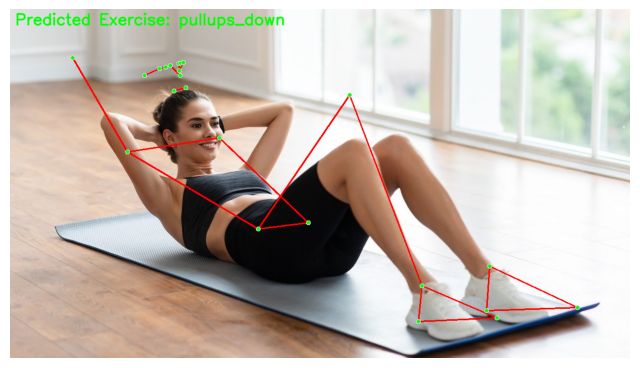

In [269]:
# Test the pipeline with an test image
image_path = '/kaggle/input/test-image/testimg.jpg'  

# Process the image and extract features
features_cnn = process_image_for_prediction(image_path, scaler)
if features_cnn is not None:
    # Predict the exercise
    prediction = model_cnn.predict(features_cnn)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = label_encoder.inverse_transform(predicted_class)
    print("Predicted Exercise:", predicted_label[0])

    # Visualize the landmarks and prediction
    visualize_landmarks_and_prediction(image_path, predicted_label[0])
else:
    print("Failed to process image for prediction.")